In [1]:
import mne
from matplotlib import pyplot as plt
from mne.datasets import sample

In [2]:
help(sample)

Help on package mne.datasets.sample in mne.datasets:

NAME
    mne.datasets.sample - MNE sample dataset.

PACKAGE CONTENTS
    sample

FILE
    d:\user\mrrai\.conda\envs\mneenv\lib\site-packages\mne\datasets\sample\__init__.py




In [3]:
sample

<module 'mne.datasets.sample' from 'D:\\User\\mrrai\\.conda\\envs\\MNEenv\\lib\\site-packages\\mne\\datasets\\sample\\__init__.py'>

In [4]:
data_path = sample.data_path()
data_path

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|#####################################| 1.65G/1.65G [00:00<00:00, 3.28TB/s]
Untarring contents of 'C:\Users\mrrai\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\mrrai\mne_data'


Attempting to create new mne-python configuration file:
C:\Users\mrrai\.mne\mne-python.json


WindowsPath('C:/Users/mrrai/mne_data/MNE-sample-data')

## 1. `mne.io.read_raw_fif(data_path)`读取原始数据

In [7]:
# 读取原始的 fif 文件
file_path = str(data_path)+"/MEG/sample/sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(file_path)
raw

Opening raw data file C:\Users\mrrai\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

## 2. 获取10-20秒内的良好的MEG数据

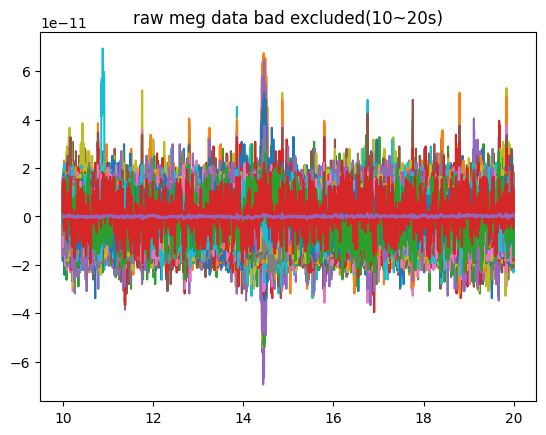

In [10]:
picks = mne.pick_types(raw.info, meg=True, exclude="bads")    # 一个 picker, 从 raw 中选取 好的 MEG信号
t_idx = raw.time_as_index([10., 20.])    # 获取10到20s的时间序列
data, times = raw[picks, t_idx[0]:t_idx[1]]
plt.plot(times, data.T)
plt.title("raw meg data bad excluded(10~20s)")
plt.show()

In [12]:
data.shape

(305, 6006)

## 绘制 SSP矢量图

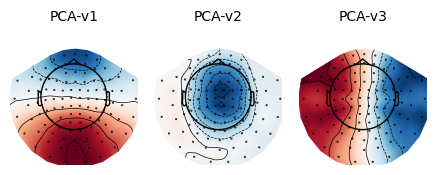

In [13]:
raw.plot_projs_topomap()
plt.show()

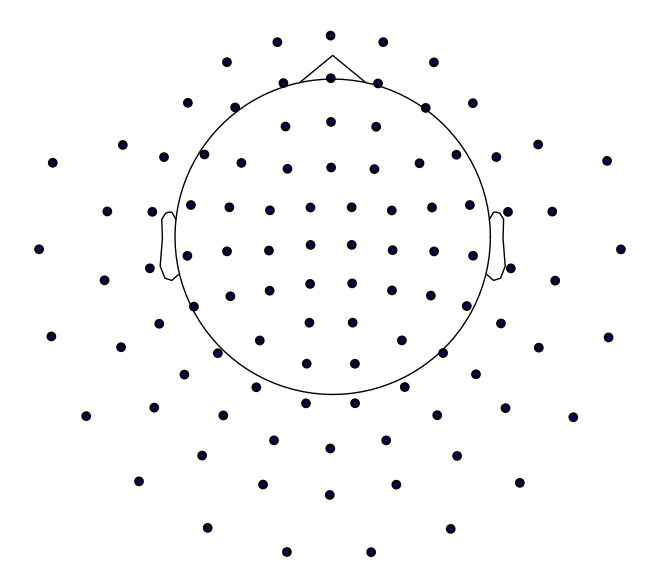

In [14]:
raw.plot_sensors()
plt.show()

In [18]:
raw[:5, :][0].shape

(5, 166800)